# Explore here

In [14]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

load_dotenv()



True

In [15]:
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

#Chequeo que tome en cuenta mi .env porque siempre salía error y no estoy segura que lo he creado bien : 

if not client_id or not client_secret:
    print("Falta alguna de las credenciales en el archivo .env")
    exit()


In [16]:
# Connexión con API de Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [17]:
#Ahora buscamos top10 de un artista con --> nombre de la canción, la popularidad y la duración (en minutos):  
#popularidad en sp = un valor numérico que indica qué tan popular es una pista en la plataforma --> en un rango de 0 a 100

artista = '3XHO7cRUPCLOr6jwp8vsx5'
top_tracks = spotify.artist_top_tracks(artista)['tracks']

print(f"Top 10 de {top_tracks[0]['artists'][0]['name']}:")
for track in top_tracks[:10]:
    minutes = track['duration_ms'] // 60000
    seconds = (track['duration_ms'] % 60000) // 1000
    print(track['name'], track['popularity'], f"{minutes} mn {seconds}")


Top 10 de alt-J:
Breezeblocks 72 3 mn 47
Left Hand Free 71 2 mn 53
Fitzpleasure 63 3 mn 39
Tessellate 61 3 mn 2
Something Good 59 3 mn 38
Matilda 59 3 mn 48
Taro 57 5 mn 14
Deadcrush 56 3 mn 52
U&ME 55 3 mn 18
Every Other Freckle 53 3 mn 36


In [18]:
# DataFrame con diccionario, ordenado con las canciones x popularidad creciente, solo top 3 :
#Creamos diccionario : 

track_data = []

for track in top_tracks:
    track_data.append({
        "Song Name": track['name'],
        "Popularity": track['popularity'],
        "Duration (mn)": f"{track['duration_ms'] // 60000} mn {(track['duration_ms'] % 60000) // 1000}"
    })

#Creamos df : 

df = pd.DataFrame(track_data)

#Ordenamos x pop : 
df_sorted = df.sort_values(by="Popularity")

#Popularidad es creaciente, pero queremos el top 3, pues los 3 ultimos : 
print(df_sorted.tail(3))

        Song Name  Popularity Duration (mn)
2    Fitzpleasure          63       3 mn 39
1  Left Hand Free          71       2 mn 53
0    Breezeblocks          72       3 mn 47


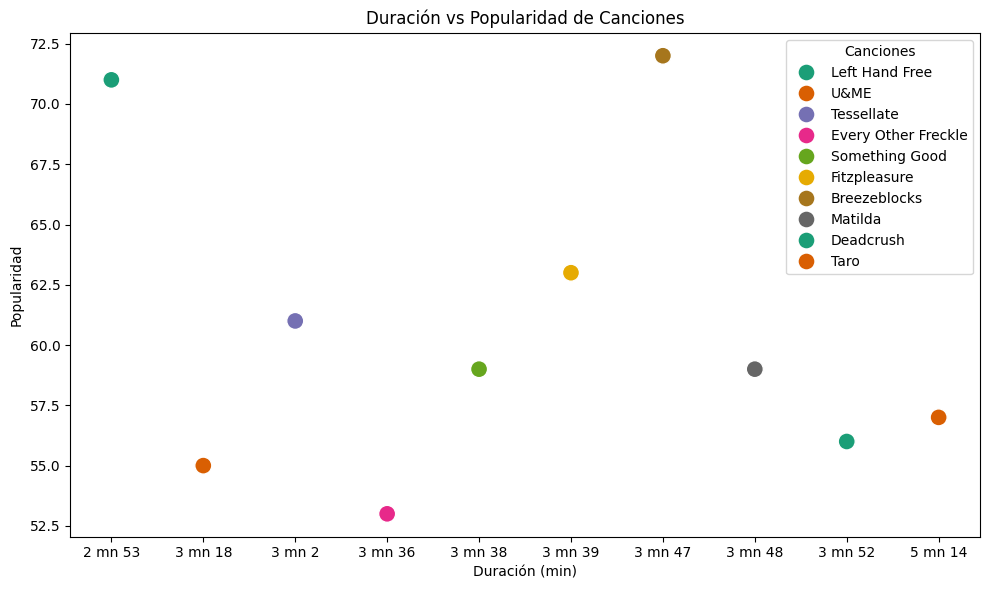

¿Podríamos decir que una canción que dure poco tiempo puede ser más popular que otra que dure más?
La canción que dura menos tiempo en ese top 10 es en efecto una canción muy popular: la segunda más popular con 71, y está muy cerca de la primera que tiene 72.
Tampoco podemos verificar eso como regla sistemática: la segunda canción más corta está dentro de las menos populares.
Y además, la canción nº1 es la séptima más larga.


In [27]:
#Scatterplot duración vs pop: 

df_sorted_dur = df.sort_values(by="Duration (mn)")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted_dur, x='Duration (mn)', y='Popularity', hue='Song Name', palette='Dark2', s=150)
#
# Nota --> hue : es para cambiar de color a cada canción y s : es para definir tamaños de los puntos del scatter, porque se veía muy pequeños, en ese caso es más visible mejor así

plt.title('Duración vs Popularidad de Canciones')
plt.xlabel('Duración (min)')
plt.ylabel('Popularidad')
plt.legend(title='Canciones')
plt.tight_layout()
plt.show()

print("¿Podríamos decir que una canción que dure poco tiempo puede ser más popular que otra que dure más?")
print("La canción que dura menos tiempo en ese top 10 es en efecto una canción muy popular: la segunda más popular con 71, y está muy cerca de la primera que tiene 72.\n"
      "Tampoco podemos verificar eso como regla sistemática: la segunda canción más corta está dentro de las menos populares.\n"
      "Y además, la canción nº1 es la séptima más larga.")